In [1]:
########
# Student ID: 10724837
# In this notebook, I carry out some basic observation of the data, as well as the EDA. I then save the final file as a .csv 
# before moving over to R to develop the regression models.
########

In [2]:
# import packages we will be using
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the data and observe basic info
diabetes = pd.read_csv("PimaDiabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
 8   Outcome           750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.9 KB


In [4]:
# check for null values
diabetes.isna().sum(axis = 0)

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

In [5]:
# there are no null values!

In [6]:
# calculate some key summary statistics
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# note that none of the minimums are less than 0, and none of the maximums are unreasonably large

In [8]:
# check the number of zero values in each column
diabetes.isin([0]).sum(axis = 0)

Pregnancies         109
Glucose               5
BloodPressure        35
SkinThickness       221
Insulin             362
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome             490
dtype: int64

In [9]:
# there are lots of zeroes in columns where it doesn't make sense
# in particular, you cannot have a SkinThickness or BMI of 0
# this is a problem with the data

In [10]:
# calculate the covariance matrix
diabetes.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,11.357474,13.984336,9.365784,-4.669891,-27.452198,0.580789,-0.034792,21.589453,0.367904
Glucose,13.984336,1025.259352,91.183692,28.873696,1226.417353,54.400449,1.492680,97.401647,7.019083
BloodPressure,9.365784,91.183692,380.593825,63.817572,194.658108,43.081800,0.278102,54.295283,0.565429
SkinThickness,-4.669891,28.873696,63.817572,253.409098,798.472669,49.798428,1.000246,-21.595683,0.623195
Insulin,-27.452198,1226.417353,194.658108,798.472669,13229.415833,178.463985,7.307274,-54.073876,7.171624
BMI,0.580789,54.400449,43.081800,49.798428,178.463985,62.843649,0.378596,3.060503,1.094182
DiabetesPedigree,-0.034792,1.492680,0.278102,1.000246,7.307274,0.378596,0.110303,0.162575,0.026997
Age,21.589453,97.401647,54.295283,-21.595683,-54.073876,3.060503,0.162575,137.097686,1.298620
Outcome,0.367904,7.019083,0.565429,0.623195,7.171624,1.094182,0.026997,1.298620,0.226791


In [11]:
# calculate the correlation matrix
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129594,0.142453,-0.087047,-0.070822,0.021739,-0.031085,0.547124,0.229235
Glucose,0.129594,1.000000,0.145972,0.056647,0.333005,0.214316,0.140364,0.259797,0.460310
BloodPressure,0.142453,0.145972,1.000000,0.205494,0.086750,0.278569,0.042922,0.237693,0.060860
SkinThickness,-0.087047,0.056647,0.205494,1.000000,0.436093,0.394615,0.189191,-0.115862,0.082205
Insulin,-0.070822,0.333005,0.086750,0.436093,1.000000,0.195726,0.191289,-0.040152,0.130928
BMI,0.021739,0.214316,0.278569,0.394615,0.195726,1.000000,0.143798,0.032972,0.289832
DiabetesPedigree,-0.031085,0.140364,0.042922,0.189191,0.191289,0.143798,1.000000,0.041807,0.170688
Age,0.547124,0.259797,0.237693,-0.115862,-0.040152,0.032972,0.041807,1.000000,0.232892
Outcome,0.229235,0.460310,0.060860,0.082205,0.130928,0.289832,0.170688,0.232892,1.000000


In [12]:
# the strongest correlations are between age and pregnancies
# and between glucose and outcome
# all columns are somewhat uncorrelated, there are no clear candidates for columns we could remove

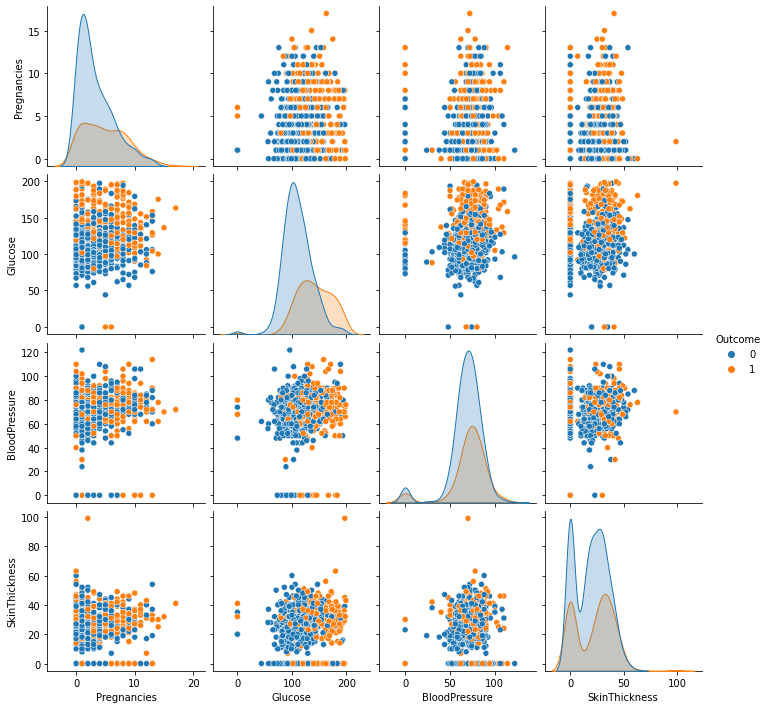

In [13]:
# we want to check the distribution of each columns
# one way to do this is by using pairplots on each column
# do 4 columns at a time for the sake of presentability
sns.pairplot(data = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Outcome']], hue = 'Outcome')

# save the figure
plt.savefig("pythonImage1.jpg")

In [14]:
# note that skin thickness is bimodal

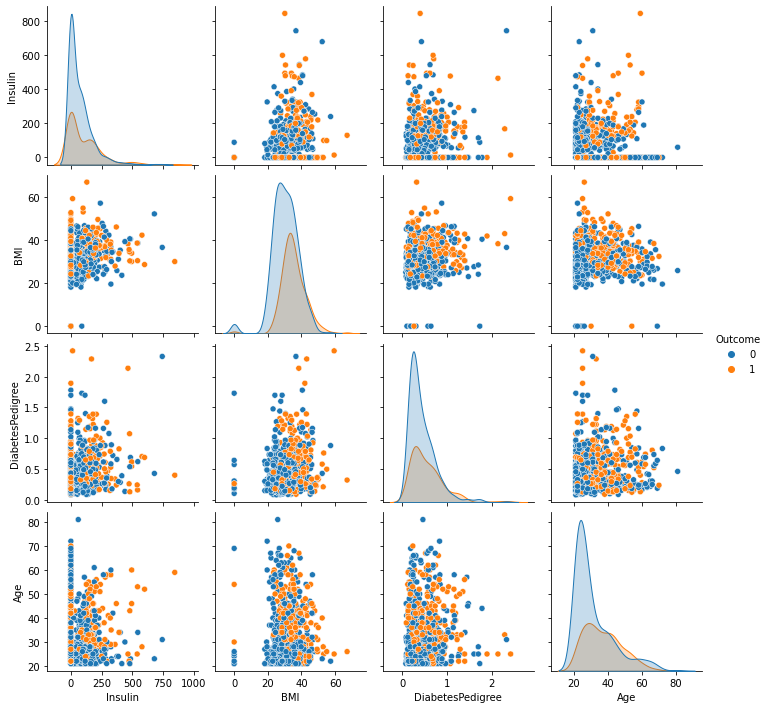

In [15]:
# pairplots for the remaining 4
sns.pairplot(data = diabetes[['Insulin','BMI','DiabetesPedigree','Age','Outcome']], hue = 'Outcome')

# save the figure
plt.savefig("pythonImage2.jpg")

In [16]:
# each column somewhat resembles a normal distribution
# centering each of the columns around the mean would not be a bad idea here, but we will not do so

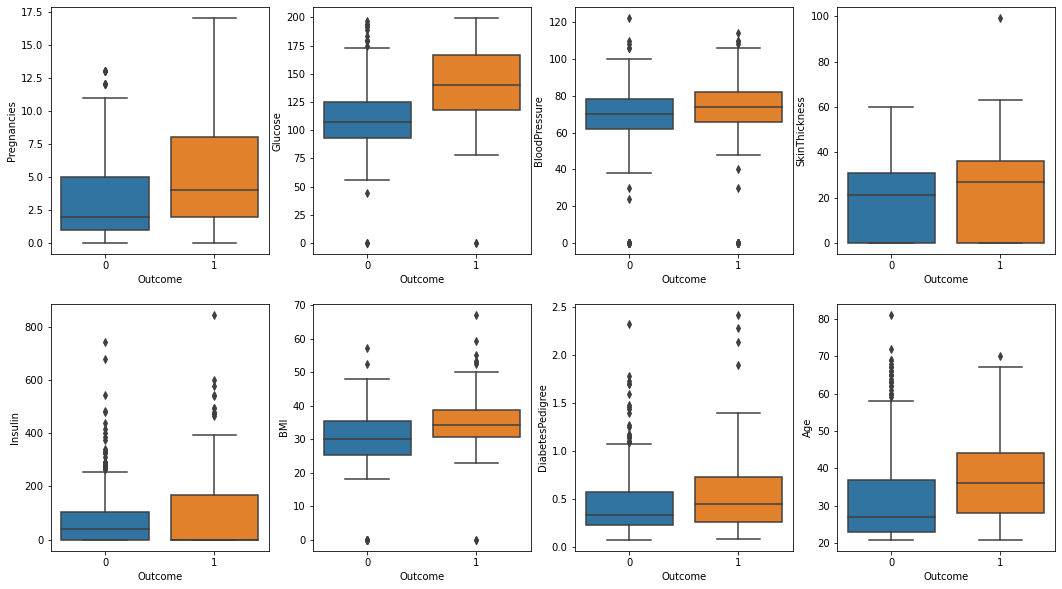

In [17]:
# boxplots for each column, showing how they change between women who do and who do not eventually end up with diabetes
plt.figure(figsize = (18,10))

plt.subplot(2,4,1)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['Pregnancies'])

plt.subplot(2,4,2)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['Glucose'])

plt.subplot(2,4,3)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['BloodPressure'])

plt.subplot(2,4,4)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['SkinThickness'])

plt.subplot(2,4,5)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['Insulin'])

plt.subplot(2,4,6)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['BMI'])

plt.subplot(2,4,7)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['DiabetesPedigree'])

plt.subplot(2,4,8)
sns.boxplot(x = diabetes['Outcome'], y = diabetes['Age'])

# save the figure
plt.savefig("pythonImage3.jpg")

In [18]:
# BloodPressure and SkinThickness do not change as much as the others do
# they will be candidates for removal from the regression model later

In [19]:
# add the column 7 or more pregnancies
diabetes['SevenOrMorePregnancies'] = np.where(diabetes['Pregnancies'] >= 7, True, False)

In [20]:
# save the diabetes dataset as a .csv and move over to R to carry on analysis
diabetes.to_csv("PimaDiabetes2.csv", index = False)